# Project: Wrangling and Analyze Data

In [1]:
#importing relevant packages
import numpy as np
import pandas as pd
import requests
import os
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# importing twitter_archive
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
twitter_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
#assessing data type
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [7]:
#Random assessment of data
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
271,841077006473256960,NaN,NaN,2017-03-13 00:02:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dawn. She's just checking pup on you. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/841077006...,12,10,Dawn,None,None,None,None
466,817171292965273600,NaN,NaN,2017-01-06 00:49:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tebow. He kindly requests that you put...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817171292...,13,10,Tebow,None,None,None,None
2197,668826086256599040,NaN,NaN,2015-11-23 16:18:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Banditt. He is a brown LaBeouf retriev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668826086...,10,10,Banditt,None,None,None,None
539,806576416489959424,NaN,NaN,2016-12-07 19:09:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Hooman catch successful. Massive hit by dog. F...,NaN,NaN,NaN,https://twitter.com/deadspin/status/8065709331...,13,10,None,None,None,None,None
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None


In [9]:
#Assessing column rating_numerator for any outliers/anomalous ratings
twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
#Assessing rating_denominator for any outlier/anomalous ratings
twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive[['rating_numerator','rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [14]:
#Assessing the name column; checking frequency of duplicated names
twitter_archive['name'].value_counts()

None         745
a             55
Charlie       12
Cooper        11
Oliver        11
Lucy          11
Lola          10
Tucker        10
Penny         10
Bo             9
Winston        9
Sadie          8
the            8
Buddy          7
Bailey         7
Daisy          7
an             7
Toby           7
Leo            6
Oscar          6
Jax            6
Milo           6
Dave           6
Scout          6
Stanley        6
Koda           6
Rusty          6
Bella          6
Jack           6
Sammy          5
            ... 
Vinscent       1
Aqua           1
Kuyu           1
Carter         1
Stuart         1
Ike            1
Ginger         1
Jimbo          1
Striker        1
Nico           1
Baron          1
Pilot          1
Dylan          1
Zeus           1
Fletcher       1
Travis         1
Ruffles        1
life           1
Acro           1
Wafer          1
Jay            1
Chloe          1
Carper         1
Rolf           1
Cecil          1
Kona           1
Theo           1
Herb          

In [13]:
#Assessing unique values in column doggo,pupper,puppo and floofer
print(twitter_archive['doggo'].unique())
print(twitter_archive['pupper'].unique())
print(twitter_archive['puppo'].unique())
print(twitter_archive['floofer'].unique())

['None' 'doggo']
['None' 'pupper']
['None' 'puppo']
['None' 'floofer']


In [15]:
#Folder creation
folder_name='image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [16]:
#web scraping data
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)


In [17]:
with open (os.path.join(folder_name,url.split('/')[-1]),  mode='wb') as file:
  file.write(r.content)

In [18]:
os.listdir(folder_name)

['image-predictions.tsv']

In [19]:
#importing the data to pandas df
image_predictions=pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [20]:
#Assessing data type
image_predictions.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
#Assessing  true and false dogs in column p1-dog,p2_dog and P3-dog
print(image_predictions['p1_dog'].value_counts())
print(image_predictions['p2_dog'].value_counts())
print(image_predictions['p3_dog'].value_counts())


True     1532
False     543
Name: p1_dog, dtype: int64
True     1553
False     522
Name: p2_dog, dtype: int64
True     1499
False     576
Name: p3_dog, dtype: int64


In [26]:
#describe p1_conf,p2_conf,and p3_conf,
image_predictions[['p1_conf','p2_conf','p3_conf']].describe()

,p1_conf,p2_conf,p3_conf
count,2075.000000,2.075000e+03,2.075000e+03
mean,0.594548,1.345886e-01,6.032417e-02
std,0.271174,1.006657e-01,5.090593e-02
min,0.044333,1.011300e-08,1.740170e-10
25%,0.364412,5.388625e-02,1.622240e-02
50%,0.588230,1.181810e-01,4.944380e-02
75%,0.843855,1.955655e-01,9.180755e-02
max,1.000000,4.880140e-01,2.734190e-01


In [27]:
#Twitter data access
consumer_key = 'UyI6SVKa4MEl5drNE4gnfUeuH'
consumer_secret = '9YWktfQi0giiTmnG2xQtWDAkgchfNX2OUwQIxkx1DTJC1gtNnN'
access_token = '2506892969-mTvtO5RDePTLvrIw51CDqUssj1ct1FGmbVg7x2n'
access_secret = 'gyeL99LZIvC1MXIQRD9rtAT0j9wk6Lr84IaYTtBSz1zCi'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [28]:
api = tweepy.API(auth, wait_on_rate_limit=True)

In [29]:
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [31]:
# Querying Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Saving each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

In [34]:
# loading tweet_df data
data=[]
with open('tweet_json.txt','r') as json_file:
    for line in json_file:
        tweets=json.loads(line)
        data.append(tweets)
        tweet_df=pd.DataFrame(data,columns=['id','retweet_count','favorite_count','full_text'])
       
   

In [36]:
tweet_df

,id,retweet_count,favorite_count,full_text
0,892420643555336193,7009,33807,This is Phineas. He's a mystical boy. Only eve...
1,892177421306343426,5301,29330,This is Tilly. She's just checking pup on you....
2,891815181378084864,3481,22052,This is Archie. He is a rare Norwegian Pouncin...
3,891689557279858688,7225,36938,This is Darla. She commenced a snooze mid meal...
4,891327558926688256,7760,35308,This is Franklin. He would like you to stop ca...
5,891087950875897856,2602,17812,Here we have a majestic great white breaching ...
6,890971913173991426,1663,10363,Meet Jax. He enjoys ice cream so much he gets ...
7,890729181411237888,15752,56866,When you watch your owner call another dog a g...
8,890609185150312448,3620,24525,This is Zoey. She doesn't want to be one of th...
9,890240255349198849,6098,27963,This is Cassie. She is a college pup. Studying...


In [37]:
#Assessing data type
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2325 entries, 0 to 2324
Data columns (total 4 columns):
id                2325 non-null int64
retweet_count     2325 non-null int64
favorite_count    2325 non-null int64
full_text         2325 non-null object
dtypes: int64(3), object(1)
memory usage: 72.7+ KB


In [38]:
tweet_df[['retweet_count','favorite_count']].describe()

,retweet_count,favorite_count
count,2325.000000,2325.000000
mean,2471.393118,7059.823656
std,4186.715632,10966.384983
min,1.000000,0.000000
25%,494.000000,1228.000000
50%,1149.000000,3050.000000
75%,2860.000000,8614.000000
max,70742.000000,144893.000000


In [39]:
#Assessing duplicated columns across the 3 data frames
all_columns = pd.Series(list(twitter_archive) + list(image_predictions) + list(tweet_df))
all_columns[all_columns.duplicated()]

17    tweet_id
dtype: object

In [ ]:
# The Data frames
twitter_archive=pd.read_csv('twitter-archive-enhanced.csv')
image_predictions=pd.read_csv('image_predictions/image-predictions.tsv',sep='\t')
tweet_df

#### Assessing

#### Quality
##### `twitter_archive` table
- Anomalous numerator ratings that are above 30
- anomalous denominator ratings that are !=10
- Find tweet_id with original rating(no retweet)
- Nulls represented as None in columns puppo,floofer,pupper and doggo 
- Nulls represented as 'none' in the column name.__Given the available data,nothing much can be done about this__
- Erroneous datatypes for  columns  puppo,floofer,pupper and doggo
- Dogs named as 'a'
- Retaining only relevant columns  for analysis
- Erroneous datatypes for timestamp column 




##### `image_predictions` table
- Some predictions are not for a dog
- Inconsitencies of p1_dog, p2_dog and p3_dog values



##### `tweet_df` table 
- Rename 'id' column to tweet_id for uniformity across all the dataframes 


##### `Tidiness` 
- Eliminate duplicated tweet_id column in the 3 dataframes by having a single dataframe
- Columns puppo,doggo,floofer and pupper should be one column called dog_type


##### `Cleaning` 

In [40]:
# Making a copy of the original data
twitter_archive_clean = twitter_archive.copy()
image_predictions_clean = image_predictions.copy()
tweet_df_clean = tweet_df.copy()

##### `Define`
- melt column puppo,pupper,doggo and floofer to one column:dog_stage column
- Drop null values represented in this columns as None
- Retaining a few relevant column in twitter_archive_clean

#### Code

In [41]:
twitter_archive_clean=pd.melt(twitter_archive_clean,id_vars=['tweet_id','timestamp','expanded_urls','rating_numerator','rating_denominator','name'],value_vars=['doggo','floofer','pupper','puppo'],
                        var_name='dog_stage',value_name='dog_type' )
twitter_archive_clean=twitter_archive_clean[twitter_archive_clean.dog_type!= "None"]
twitter_archive_clean=twitter_archive_clean.drop('dog_type',axis=1) 

#### First_Test

In [49]:
twitter_archive_clean.sample(9)

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
5130,822462944365645825,2017-01-20 15:17:01 +0000,https://twitter.com/dog_rates/status/822462944...,14,10,Gabe,pupper
429,821107785811234820,2017-01-16 21:32:06 +0000,https://twitter.com/dog_rates/status/821107785...,11,10,None,doggo
6484,678278586130948096,2015-12-19 18:19:51 +0000,https://twitter.com/dog_rates/status/678278586...,10,10,None,pupper
6201,692905862751522816,2016-01-29 03:03:25 +0000,https://twitter.com/dog_rates/status/692905862...,10,10,Wally,pupper
363,829374341691346946,2017-02-08 17:00:26 +0000,https://twitter.com/dog_rates/status/829374341...,13,10,Astrid,doggo
7463,825535076884762624,2017-01-29 02:44:34 +0000,https://twitter.com/dog_rates/status/825535076...,14,10,None,puppo
985,749075273010798592,2016-07-02 03:00:36 +0000,https://vine.co/v/5ztZvHgI17r,11,10,Boomer,doggo
6369,683142553609318400,2016-01-02 04:27:31 +0000,https://twitter.com/dog_rates/status/683142553...,9,10,Brandy,pupper
956,751583847268179968,2016-07-09 01:08:47 +0000,https://twitter.com/dog_rates/status/751583847...,5,10,None,doggo


#### Second_Test

In [43]:
twitter_archive_clean['dog_stage'].unique()

array(['doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

##### `Define` 
- find tweet_id with original rating(no retweet) 


#### Code

In [44]:
Merged_df=pd.merge(twitter_archive_clean,image_predictions, on='tweet_id')

#### Test

In [50]:
Merged_df.sample(5)

,tweet_id,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
100,886366144734445568,2017-07-15 23:25:31 +0000,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper,https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True
49,799757965289017345,2016-11-18 23:35:32 +0000,https://twitter.com/dog_rates/status/799757965...,13,10,Sobe,doggo,https://pbs.twimg.com/media/CxlPnoSUcAEXf1i.jpg,1,Border_collie,0.442534,True,collie,0.288684,True,Shetland_sheepdog,0.196399,True
289,674038233588723717,2015-12-08 01:30:12 +0000,https://twitter.com/dog_rates/status/674038233...,12,10,Kaiya,pupper,https://pbs.twimg.com/media/CVqqMtiVEAEye_L.jpg,1,Eskimo_dog,0.358459,True,Norwegian_elkhound,0.206963,True,malamute,0.148236,True
92,716080869887381504,2016-04-02 01:52:38 +0000,https://twitter.com/dog_rates/status/716080869...,11,10,None,doggo,https://pbs.twimg.com/media/CfAHv83UMAIEQYx.jpg,1,golden_retriever,0.638625,True,chow,0.254717,True,Tibetan_mastiff,0.071732,True
180,707411934438625280,2016-03-09 03:45:22 +0000,https://twitter.com/dog_rates/status/707411934...,11,10,None,pupper,https://pbs.twimg.com/media/CdE7ZktXIAEiWLj.jpg,1,Lakeland_terrier,0.738277,True,Airedale,0.028515,True,giant_schnauzer,0.024876,True


##### `Define` 
- Rename  tweet_df_clean id column to tweet_id column for uniformity across the all the dataframes

#### code

In [51]:
tweet_df_clean.rename(columns={'id' : 'tweet_id'},inplace=True)

#### Test


In [52]:
tweet_df_clean.head(1)

,tweet_id,retweet_count,favorite_count,full_text
0,892420643555336193,7009,33807,This is Phineas. He's a mystical boy. Only eve...


##### `Define` 
- Eliminate duplicated tweet_id column in the  dataframes by having a single dataframe

#### Code

In [53]:
tidy_master_df=pd.merge(tweet_df_clean,Merged_df, on='tweet_id')

#### Test

In [55]:
tidy_master_df.head(4)

,tweet_id,retweet_count,favorite_count,full_text,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,6098,27963,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51 +0000,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,8349,42052,Here's a puppo that seems to be on the fence a...,2017-07-25 01:55:32 +0000,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,1881,13353,This is Stuart. He's sporting his favorite fan...,2017-07-24 17:02:04 +0000,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
3,886366144734445568,2629,18547,This is Roscoe. Another pupper fallen victim t...,2017-07-15 23:25:31 +0000,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper,...,1,French_bulldog,0.999201,True,Chihuahua,0.000361,True,Boston_bull,0.000076,True


##### `Define`
- Droppig some predictions that are not for a dog
- Removing inconsitencies of p1_dog, p2_dog and p3_dog values, i.e if p1_dog is false then p2_dog and P3_dog should also be False

#### Code

In [57]:
tidy_master_df=tidy_master_df[tidy_master_df['p1_dog'] != False]
tidy_master_df=tidy_master_df[tidy_master_df['p2_dog'] != False]
tidy_master_df=tidy_master_df[tidy_master_df['p3_dog'] != False]

#### Test


In [58]:
print(tidy_master_df['p1_dog'].unique())
print(tidy_master_df['p2_dog'].unique())
print(tidy_master_df['p3_dog'].unique())

[ True]
[ True]
[ True]


In [59]:
tidy_master_df.sample(7)

,tweet_id,retweet_count,favorite_count,full_text,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
9,877611172832227328,70,0,RT @rachel2195: @dog_rates the boyfriend and h...,2017-06-21 19:36:23 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,pupper,...,1,Irish_setter,0.364729,True,golden_retriever,0.202907,True,Irish_terrier,0.107473,True
27,850019790995546112,4379,18801,Say hello to Boomer. He's a sandy pupper. Havi...,2017-04-06 16:18:05 +0000,https://twitter.com/dog_rates/status/850019790...,12,10,Boomer,pupper,...,3,Shetland_sheepdog,0.759907,True,collie,0.107405,True,Pembroke,0.052335,True
275,680473011644985345,674,2345,This is Hector. He thinks he's a hammer. Silly...,2015-12-25 19:39:43 +0000,https://twitter.com/dog_rates/status/680473011...,10,10,Hector,pupper,...,1,Lakeland_terrier,0.796694,True,West_Highland_white_terrier,0.138709,True,Norwich_terrier,0.016253,True
2,889531135344209921,1881,13353,This is Stuart. He's sporting his favorite fan...,2017-07-24 17:02:04 +0000,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True
198,708845821941387268,806,2746,Here's a pupper with magic eyes. Not wearing a...,2016-03-13 02:43:08 +0000,https://twitter.com/dog_rates/status/708845821...,9,10,None,pupper,...,1,schipperke,0.745640,True,kelpie,0.167853,True,Boston_bull,0.014763,True
220,697596423848730625,1135,2791,Here's a pupper with a piece of pizza. Two of ...,2016-02-11 01:42:02 +0000,https://twitter.com/dog_rates/status/697596423...,11,10,None,pupper,...,1,Shetland_sheepdog,0.621668,True,collie,0.366578,True,Pembroke,0.007698,True
262,683481228088049664,904,2451,Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,2016-01-03 02:53:17 +0000,https://twitter.com/dog_rates/status/683481228...,11,10,Banjo,pupper,...,1,keeshond,0.508951,True,chow,0.442016,True,German_shepherd,0.013206,True


##### `Define`
- anomalous numerator ratings that are above 30
- anomalous denominator ratings that are !=10 
- Dogs named as 'a

##### `Code`
- Anomalous numerator and denominator rating disappears naturally during the cleaning process; i.e when finding tweets with no retweets and when  dropping predictions that are not dogs
- Dogs named as 'a' has  reduced  from 55 to 2 during the cleaning process. A check through reveals the 2 were tweeted in different months  having different texts hence not a duplicate record.

#### Test_1

In [61]:
tidy_master_df['rating_numerator'].value_counts()

12    56
11    45
13    41
10    34
9     12
14    10
8      5
27     1
Name: rating_numerator, dtype: int64

#### Test_2

In [62]:
tidy_master_df['rating_denominator'].value_counts()

10    204
Name: rating_denominator, dtype: int64

#### Test_3

In [63]:
tidy_master_df[tidy_master_df['name']=='a']

,tweet_id,retweet_count,favorite_count,full_text,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
159,743222593470234624,1744,5736,This is a very rare Great Alaskan Bush Pupper....,2016-06-15 23:24:09 +0000,https://twitter.com/dog_rates/status/743222593...,12,10,a,pupper,...,1,kuvasz,0.350629,True,soft-coated_wheaten_terrier,0.182782,True,golden_retriever,0.087662,True
213,700864154249383937,559,2403,"""Pupper is a present to world. Here is a bow f...",2016-02-20 02:06:50 +0000,https://twitter.com/dog_rates/status/700864154...,12,10,a,pupper,...,1,kuvasz,0.805857,True,Great_Pyrenees,0.187272,True,Samoyed,0.003491,True


##### `Define`
- Convert dog_stage to categorical data type
- Convert timestamp to datetime data type

In [64]:
### To category
tidy_master_df.dog_stage = tidy_master_df.dog_stage.astype('category')


### To datetime
tidy_master_df.timestamp = pd.to_datetime(tidy_master_df.timestamp)


#### Test

In [65]:
tidy_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 330
Data columns (total 21 columns):
tweet_id              204 non-null int64
retweet_count         204 non-null int64
favorite_count        204 non-null int64
full_text             204 non-null object
timestamp             204 non-null datetime64[ns]
expanded_urls         204 non-null object
rating_numerator      204 non-null int64
rating_denominator    204 non-null int64
name                  204 non-null object
dog_stage             204 non-null category
jpg_url               204 non-null object
img_num               204 non-null int64
p1                    204 non-null object
p1_conf               204 non-null float64
p1_dog                204 non-null bool
p2                    204 non-null object
p2_conf               204 non-null float64
p2_dog                204 non-null bool
p3                    204 non-null object
p3_conf               204 non-null float64
p3_dog                204 non-null bool
dtypes: bool

# Storing data

In [2]:
tidy_master_df.to_csv('twitter_archive_master.csv', index=False)

NameError: name 'tidy_master_df' is not defined

## Data analysis and visualization

In [3]:
#importing dataframe for analysis
twitter_archive_master=pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head(3)


,tweet_id,retweet_count,favorite_count,full_text,timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,890240255349198849,6098,27963,This is Cassie. She is a college pup. Studying...,2017-07-26 15:59:51,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
1,889665388333682689,8349,42052,Here's a puppo that seems to be on the fence a...,2017-07-25 01:55:32,https://twitter.com/dog_rates/status/889665388...,13,10,None,puppo,...,1,Pembroke,0.966327,True,Cardigan,0.027356,True,basenji,0.004633,True
2,889531135344209921,1881,13353,This is Stuart. He's sporting his favorite fan...,2017-07-24 17:02:04,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,puppo,...,1,golden_retriever,0.953442,True,Labrador_retriever,0.013834,True,redbone,0.007958,True


In [4]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 21 columns):
tweet_id              204 non-null int64
retweet_count         204 non-null int64
favorite_count        204 non-null int64
full_text             204 non-null object
timestamp             204 non-null object
expanded_urls         204 non-null object
rating_numerator      204 non-null int64
rating_denominator    204 non-null int64
name                  204 non-null object
dog_stage             204 non-null object
jpg_url               204 non-null object
img_num               204 non-null int64
p1                    204 non-null object
p1_conf               204 non-null float64
p1_dog                204 non-null bool
p2                    204 non-null object
p2_conf               204 non-null float64
p2_dog                204 non-null bool
p3                    204 non-null object
p3_conf               204 non-null float64
p3_dog                204 non-null bool
dtypes: bool(3), float

In [73]:
#sum of favorite_count
sum_favorite=twitter_archive_master.groupby(['dog_stage'],as_index=True)['favorite_count'].sum()
sum_favorite

dog_stage
doggo      747909
floofer     88324
pupper     889118
puppo      424611
Name: favorite_count, dtype: int64

#### pupper has the highest favorite sum while floofer has the lowest favorite sum. The margin between doggo and pupper  for this variable is relatively large with a figure of over 100,000.

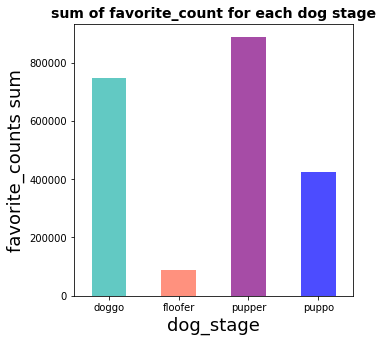

In [75]:
#data visualization

sum_favorite.plot(kind='bar',color =['lightseagreen', 'tomato','purple','blue'],alpha=0.7,figsize=(5,5))
plt.title('sum of favorite_count for each dog stage',fontsize=14,weight="bold")
plt.xlabel('dog_stage',fontsize=18)
plt.ylabel('favorite_counts sum',fontsize=18)
plt.xticks(rotation=360)
plt.show()

In [76]:
#sum of retweet counts
sum_retweet=twitter_archive_master.groupby(['dog_stage'],as_index=True)['retweet_count'].sum()
sum_retweet

dog_stage
doggo      278473
floofer     28650
pupper     289546
puppo      117621
Name: retweet_count, dtype: int64

#### pupper has the highest retweet_count sum and floofer has the lowest retweet_count sum. The margin for doggo and pupper for this variable is less than 2% which is relatively small

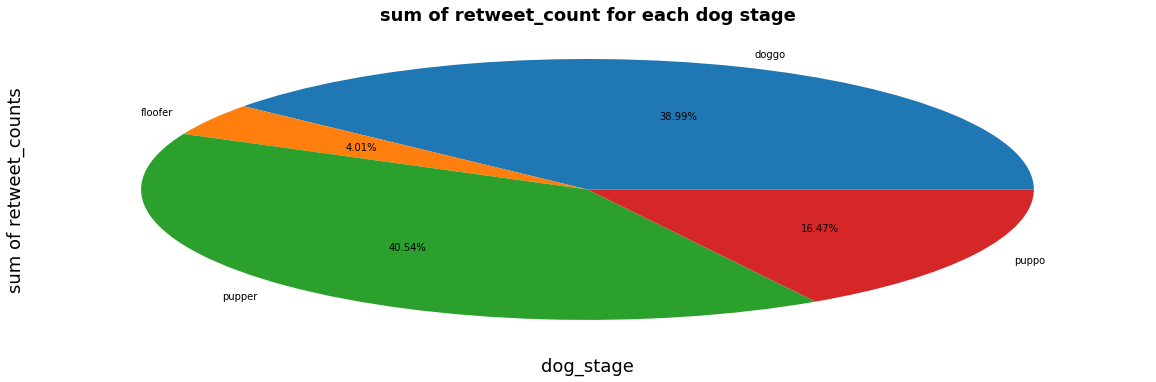

In [92]:
#data visualization


sum_retweet.plot(kind='pie',subplots=True,figsize=(20,6),autopct=('%1.2f%%'))
plt.title('sum of retweet_count for each dog stage',fontsize=18,weight="bold")
plt.xlabel('dog_stage',fontsize=18)
plt.ylabel('sum of retweet_counts',fontsize=18)
plt.xticks(rotation=360)
plt.show()

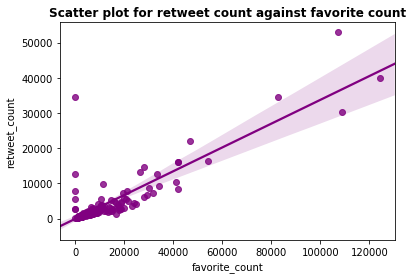

In [26]:
#reg plot for retweet_count against favorite count
sns.regplot(x = "favorite_count",
            y = "retweet_count",
            color="purple",
            data = twitter_archive_master)
plt.title('Scatter plot for retweet count against favorite count',fontsize=12, weight='bold')
plt.show()

#### Favorite count and retweet count have a positive correlation

In [81]:
sum_numerator=twitter_archive_master.groupby(['dog_stage'],as_index=True)['rating_numerator'].sum()
sum_numerator

dog_stage
doggo       579
floofer      83
pupper     1463
puppo       230
Name: rating_numerator, dtype: int64

#### Pupper had the highest  numerator rating while floofer had the lowest  numerator rating

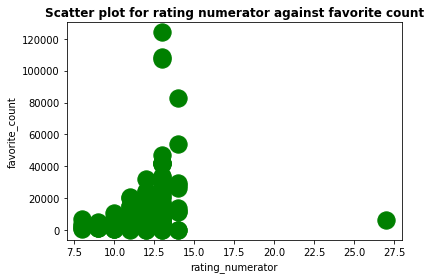

In [91]:
#Scatter plot visualization
twitter_archive_master.plot.scatter(x = 'rating_numerator', y = 'favorite_count',s = 300, c='green');
plt.title('Scatter plot for rating numerator against favorite count',fontsize=12, weight='bold')
plt.show()

#### There is no relatioship between rating and favorite count, most rating seem to concetrate between 11 and 14.

In [99]:
#Img_num counts based on dog stage
img_num_counts=twitter_archive_master.groupby(['dog_stage'],as_index=True)['img_num'].value_counts()
img_num_counts

dog_stage  img_num
doggo      1           37
           2            9
           3            1
           4            1
floofer    1            6
           2            1
pupper     1          104
           2           16
           3            7
           4            3
puppo      1           12
           2            6
           3            1
Name: img_num, dtype: int64